## Описание проекта "Увеличение выручки интернет-магазина. Гипотезы"

<br>Перед нами данные крупного интернет-магазина. Исследование состоит из 2х частей: первая - этот приоритеизация гипетез, вторая - анализ А/В теста.

<br><b>Цель</b> - увеличение выручки.

<b>Задачи:</b>
1. Приоритиризация гипотез,
2. Запуск А/В тестов,
3. Анализ результатов

### Описание данных

<br><b>Файл /datasets/hypothesis.csv.</b> 
<br>*Hypothesis — краткое описание гипотезы;
<br>*Reach — охват пользователей по 10-балльной шкале;
<br>*Impact — влияние на пользователей по 10-балльной шкале;
<br>*Confidence — уверенность в гипотезе по 10-балльной шкале;
<br>*Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<br><b>Файл /datasets/orders.csv.</b>
<br>*transactionId — идентификатор заказа;
<br>*visitorId — идентификатор пользователя, совершившего заказ;
<br>*date — дата, когда был совершён заказ;
<br>*revenue — выручка заказа;
<br>*group — группа A/B-теста, в которую попал заказ.

<br><b>Файл /datasets/visitors.csv. </b>
<br>*date — дата;
<br>*group — группа A/B-теста;
<br>*visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Изучение данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st
import math as mth
import scipy.stats as stats

In [2]:
# скачиваем датасеты
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv',  sep=',')

In [3]:
# изучаем общую информацию о файле hypothesis
hypothesis.info()
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
# расширим ячейку с гипотезами
pd.set_option("max_colwidth", 200)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# приводим названия столбцов к нижнему регистру
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]

In [6]:
# проверка применения кода
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

## Часть 1. Приоритизация гипотез

### ICE

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [7]:
# применяем фреймворк ICE для приоритизации гипотез. Сортируем их по убыванию приоритета.
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(2)
display(hypothesis.sort_values(by='ICE', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### RICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [8]:
# применяем фреймворк RICE для приоритизации гипотез. Сортируем их по убыванию приоритета.
hypothesis['RICE']  = ((hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']).round(2)
display(hypothesis.sort_values(by='RICE', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### График изменения приоритезации по методам ICE & RICE

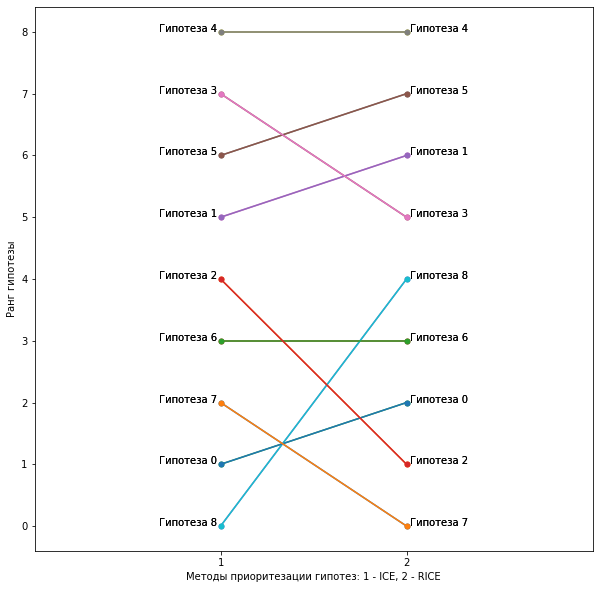

In [9]:
# строим график изменения приоритезации по методам
hypothesis['Hypothesis_number'] = (['Гипотеза 0', 'Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3', 
                                    'Гипотеза 4', 'Гипотеза 5', 'Гипотеза 6', 'Гипотеза 7', 
                                    'Гипотеза 8'])

rice = (hypothesis[['Hypothesis_number', 'RICE']]
        .sort_values(by='RICE', ascending=False, ignore_index=True))

rice['RICE'] = 2

rice.rename(columns={'RICE': 'metod'}, inplace=True)

ice = (hypothesis[['Hypothesis_number', 'ICE']]
       .sort_values(by='ICE', ascending=False, ignore_index=True))

ice['ICE'] = 1

ice.rename(columns={'ICE': 'metod'}, inplace=True)

df_append = rice.append(ice, ignore_index=False) 


fig, ax = plt.subplots(1, figsize=(10,10))

for i in df_append['Hypothesis_number']:
    temp = df_append[df_append['Hypothesis_number'] == i]
    plt.plot(temp.metod, temp.index, marker='o', markersize=5)
    # end label
    plt.text(temp.metod.values[0]+0.02, temp.index.values[0], i)
    # start label
    plt.text(temp.metod.values[1]-0.02, temp.index.values[1], i, ha='right')
plt.xlabel('Методы приоритезации гипотез: 1 - ICE, 2 - RICE')
plt.ylabel('Ранг гипотезы')
plt.xlim(0,3)
plt.xticks([1, 2])
plt.yticks();

<hr style="border: 2px solid orange;" />

<br><b>Вывод:</b>
<br>При применении метода RICE изменилась приоретизация гипотез, это произошло так как в данном методе мы также учиваем охват аудитории, которых затронет гипотеза, и это в свою очередь, влияет на результат.

## Часть 2. Анализ A/B-теста

### Подготовка данных

In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# меняем тип данных
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d %H:%M:%S')

orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


0

In [12]:
ordergroup = orders.groupby('group').agg({'visitorId':'nunique'})
ordergroup

,visitorId
group,
A,503
B,586


In [13]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# меняем тип данных
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d %H:%M:%S')
visitors.info()
visitors.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


0

In [15]:
# проверим распределение посетителей по группам
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


In [16]:
# рассчитаем разницу в процентах
visitors.groupby('group').agg({'visitors':'sum'}).pct_change()

,visitors
group,
A,NaN
B,0.009607


<br><b>Вывод:</b>
<br>

In [17]:
# проверим количество пересекающихся пользователей
n_intersection_users = orders.groupby('visitorId').agg({'group': 'nunique'}).query("group > 1").shape[0]
print(f"Кол-во пересекающихся пользователей: {n_intersection_users}")

Кол-во пересекающихся пользователей: 58


<hr style="border: 2px solid orange;" />

<b>Вывод:</b> на данном этапе мы изучили структуру данных, изменили их тип datetime там где это необходимо, проверили наличие дубликатов, также проверили равномерность распеределния посетителей по группам в каждом файле. Разница между группами составляет менее 1%, также обнаружили 58 пересечений пользователей по группам. 

### График кумулятивной выручки по группам. 

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [19]:
# Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [20]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [21]:
# Объединим обе таблицы в одну с понятными названиями столбцов:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [22]:
# проверяем количество посетителей в каждой группе
datesGroupsp = cumulativeData.groupby('group').agg({'visitors':'nunique','orders':'nunique'})
datesGroupsp

,visitors,orders
group,,
A,31,31
B,31,31


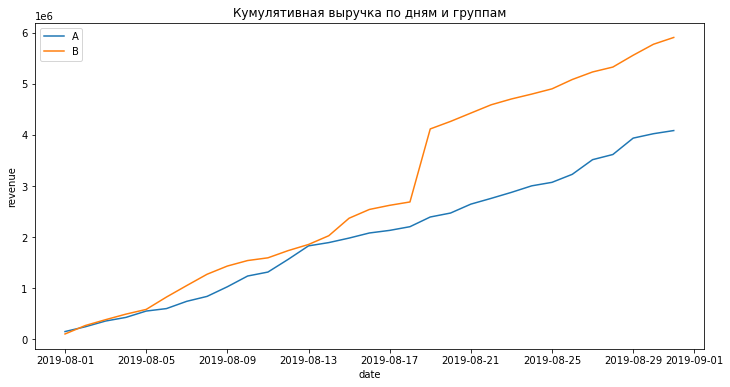

In [23]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xlabel("date")
plt.ylabel("revenue")

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням и группам')
plt.legend();


<b>Вывод:</b> Выручка группы А почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки группы В в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Средний чек по группам

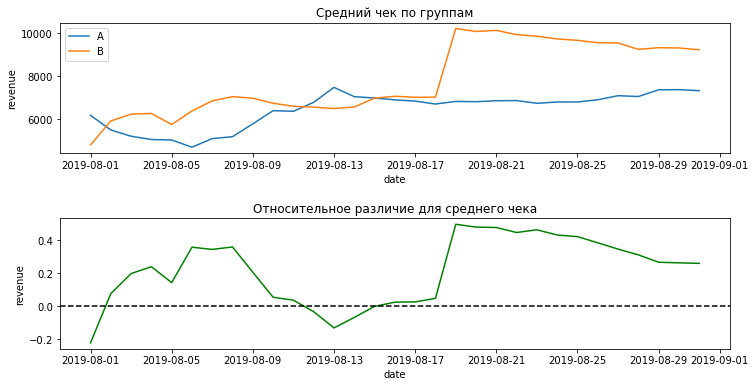

In [24]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
fig, axes = plt.subplots(nrows=2, figsize=(12,6))
plt.subplots_adjust(hspace=0.5)

ax = axes[0]
ax.set_xlabel("date")
ax.set_ylabel("revenue")
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.set_title('Средний чек по группам')
ax.legend();

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
ax = axes[1]
ax.set_xlabel("date")
ax.set_ylabel("revenue")
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
       color='green')

# добавляем ось X
ax.axhline(y=0, color='black', linestyle='--') 
ax.set_title('Относительное различие для среднего чека');

<b>Вывод:</b> Как и в данных по кумулятиной выручке в группе В наблюдаются резкий скачок, что может быть связяно в очень дорогим заказом.
Согласно графику относительного различия чеков можно сделать вывод, что средний чек группы В выше, за исключением 13 августа 2019, когда средний чек группы А превысил группу В.

### Кумулятивная конверсия

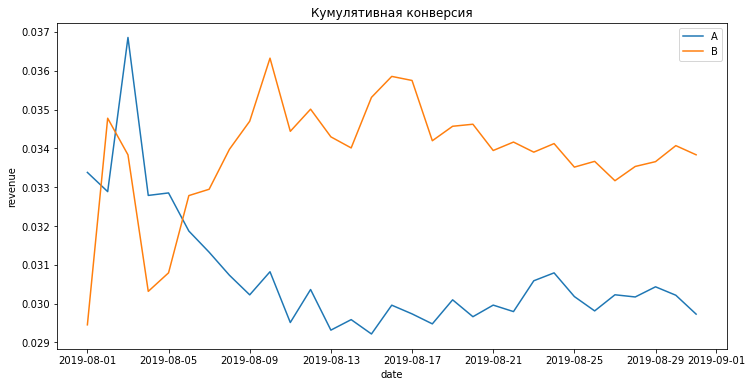

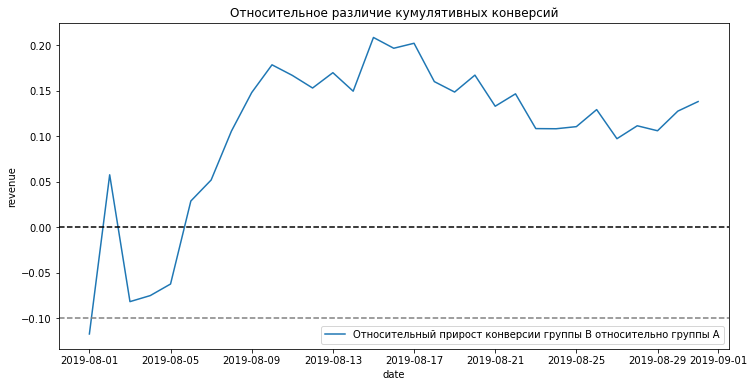

In [25]:
# Аналогично проанализируем график кумулятивной конверсии. 

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,6))
plt.xlabel("date")
plt.ylabel("revenue")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')
plt.legend();
#Построим график относительного различия кумулятивных конверсий:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.xlabel("date")
plt.ylabel("revenue")
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное различие кумулятивных конверсий');


<b>Вывод:</b> Конверсия группы В значительно выше , чем у группы А, вероятно, это также связано с дорогими заказами. Данную тенденцию также можно наблюдать на графике относительного различия кумулятивных конверсий, за исключенем 3 августа 2019 г, когда конверсия группы А привысили конверсию группы В.

### Накопительная выручка по пользователям

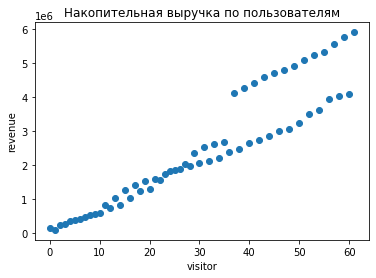

In [26]:
# Постройте точечный график количества заказов по пользователям.
x_values = pd.Series(range(0,len(cumulativeData['revenue']))) 
plt.scatter(x_values, cumulativeData['revenue'])
plt.xlabel("visitor")
plt.ylabel("revenue")
plt.title('Накопительная выручка по пользователям');

In [27]:
# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
print(np.percentile(cumulativeData['revenue'], [95, 97.5, 99])) 

[5323467.6   5661633.675 5826551.31 ]


<b>Вывод:</b> Не более 5% выручки больше 5661633.675 рублей и не более 1% дороже 5826551.31 рублей.

### Число заказов на 1го пользователя

In [28]:
# подсчитаем количество заказов по пользователям 
ordersByUsers = (
    cumulativeData.groupby('visitors', as_index=False)
    .agg({'orders': pd.Series.nunique})
)

ordersByUsers.columns = ['visitors', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 


    visitors  orders
0        713       1
46     14322       1
33     10459       1
34     11127       1
35     11171       1
36     11629       1
37     11658       1
38     12204       1
39     12218       1
40     12850       1


<b>Вывод:</b> Каждый пользователь сделал по одному заказу, вероятно, сущесвует высокая разница в стоимости заказа.

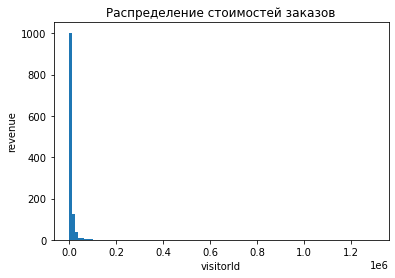

In [29]:
plt.hist(orders['revenue'], bins=100) 
#order_by_user = orders.groupby('visitorId').agg({'revenue':'sum'}).sort_values(by='revenue', ascending = False)
#order_by_user.hist(bins=200)
plt.title('Распределение стоимостей заказов')
plt.xlabel("visitorId")
plt.ylabel("revenue");

<a class="anchor" id="21-bullet">

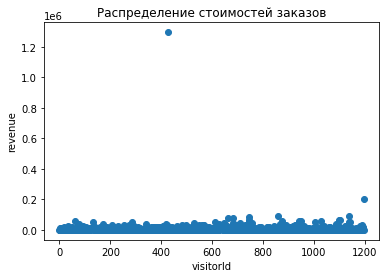

In [30]:
# построим график распределения стоимостей заказов
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel("visitorId")
plt.ylabel("revenue");

<b>Вывод:</b> На графиках наблюдаются несколько аномально крупных заказов

In [31]:
# Посчитаем выборочные перцентили суммы заказов на одного пользователя:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


<b>Вывод:</b> Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей.


### Статистическая значимость различий показателей

В данном блоке определяем уровень статистической значимости 0.05 и будем применять статистический критерий Манна-Уитни.

In [32]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitors', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
# группируем заказы по группам
ordersByUsersA = (
    cumulativeData[cumulativeData['group'] == 'A']
    .groupby('visitors', as_index=False)
    .agg({'orders': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    cumulativeData[cumulativeData['group'] == 'B']
    .groupby('visitors', as_index=False)
    .agg({'orders': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


In [34]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


<br><b>Гипотезы</b>
<br>H0 - статистически значимых различий в конверсии между группами нет
<br>H1 - статистически значимые различия в конверсии между группами есть

In [35]:
# Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 
# Округлим до трёх знаков после запятой.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.017
0.138


<b>Вывод:</b> По «сырым» данным различий в конверсии групп A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом  проигрыш группы B равен 13.8% — второе число в выводе.


<br><b>Гипотезы</b>
<br>H0 - статистически значимых различий в среднем чеке между сегментами нет
<br>H1 - статистически значимые различия в среднем чеке между сегментами есть

In [36]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
#А ещё найдём относительные различия в среднем чеке между группами:

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.729
0.259


<b>Вывод:</b> P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно ниже среднего чека группы A.


In [37]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 


568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
dtype: int64
(86,)


In [38]:
#  проверим произошло ли что-нибудь с результатами по среднему чеку

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# Применим статистический критерий Манна-Уитни к полученным выборкам:

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.023
0.149


<b>Вывод:</b> Результаты по конверсии практически не изменились

In [39]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


0.866
-0.002


<b>Вывод:</b> P-value увеличился, но и разница между сегментами сократилась с 25,9% до -0.2%.
Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста!


## Общий вывод

<br>Какие выводы по тесту можем сделать?
<br>Имеющиеся факты:
<br>·	Имеются статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
<br>·	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
<br>·	График различия конверсии между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению:
<br>·	График различия среднего чека говорит о том, что результаты группы А не улучшаются день ото дня и сейчас почти на 15% хуже:

<br>Исходя из обнаруженных фактов, тест следует остановить и признать успешным, в данном экперименте сегмет В является лучше А по конверсии, увеличение которой являлось одной из поставленных задач.
